In [1]:
import pandas as pd

df = pd.read_csv("data_metrics.csv")
df.head()

thresh = 0.5
df["predicted_RF"] = (df.model_RF >= 0.5).astype("int")
df["predicted_LR"] = (df.model_LR >= 0.5).astype("int")
df.head()

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [2]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]], dtype=int64)

In [3]:
def find_TP(y_true, y_pred):
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return sum((y_true == 1) & (y_pred == 1))


def find_FN(y_true, y_pred):
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return sum((y_true == 1) & (y_pred == 0))


def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return sum((y_true == 0) & (y_pred == 1))


def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return sum((y_true == 0) & (y_pred == 0))

In [4]:
print("TP:", find_TP(df.actual_label.values, df.predicted_RF.values))
print("FN:", find_FN(df.actual_label.values, df.predicted_RF.values))
print("FP:", find_FP(df.actual_label.values, df.predicted_RF.values))
print("TN:", find_TN(df.actual_label.values, df.predicted_RF.values))

TP: 5047
FN: 2832
FP: 2360
TN: 5519


In [5]:
import numpy as np


def find_conf_matrix_values(y_true, y_pred):
    # calculate TP, FN, FP, TN
    TP = find_TP(y_true, y_pred)
    FN = find_FN(y_true, y_pred)
    FP = find_FP(y_true, y_pred)
    TN = find_TN(y_true, y_pred)
    return TP, FN, FP, TN


def skakovskyi_confusion_matrix(y_true, y_pred):
    TP, FN, FP, TN = find_conf_matrix_values(y_true, y_pred)
    return np.array([[TN, FP], [FN, TP]])

In [6]:
assert np.array_equal(
    skakovskyi_confusion_matrix(df.actual_label.values, df.predicted_RF.values),
    confusion_matrix(df.actual_label.values, df.predicted_RF.values),
), "my_confusion_matrix() is not correct for RF"

assert np.array_equal(
    skakovskyi_confusion_matrix(df.actual_label.values, df.predicted_LR.values),
    confusion_matrix(df.actual_label.values, df.predicted_LR.values),
), "my_confusion_matrix() is not correct for LR"

In [7]:
from sklearn.metrics import accuracy_score


accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

In [8]:
def skakovskyi_accuracy_score(y_true, y_pred):
    # calculates the fraction of samples
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return (TP + TN) / (TP + FN + FP + TN)

assert skakovskyi_accuracy_score(df.actual_label.values, df.predicted_RF.values) == accuracy_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert skakovskyi_accuracy_score(df.actual_label.values, df.predicted_LR.values) == accuracy_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'

print('Accuracy RF: %.3f'%(skakovskyi_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Accuracy LR: %.3f'%(skakovskyi_accuracy_score(df.actual_label.values, df.predicted_LR.values)))

Accuracy RF: 0.671
Accuracy LR: 0.616


In [9]:
from sklearn.metrics import recall_score

recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

In [10]:
def skakovskyi_recall_score(y_true, y_pred):
    # calculates the fraction of positive samples predicted correctly
    TP, FN, FP, TN = find_conf_matrix_values(y_true, y_pred)
    return TP / (TP + FN)


assert skakovskyi_recall_score(
    df.actual_label.values, df.predicted_RF.values
) == recall_score(
    df.actual_label.values, df.predicted_RF.values
), "my_accuracy_score failed on RF"
assert skakovskyi_recall_score(
    df.actual_label.values, df.predicted_LR.values
) == recall_score(
    df.actual_label.values, df.predicted_LR.values
), "my_accuracy_score failed on LR"

print(
    "Recall RF: %.3f"
    % (skakovskyi_recall_score(df.actual_label.values, df.predicted_RF.values))
)
print(
    "Recall LR: %.3f"
    % (skakovskyi_recall_score(df.actual_label.values, df.predicted_LR.values))
)

Recall RF: 0.641
Recall LR: 0.543


In [11]:
from sklearn.metrics import precision_score


precision_score(df.actual_label.values, df.predicted_RF.values)

0.681382476036182

In [12]:
def skakovskyi_precision_score(y_true, y_pred):
    # calculates the fraction of predicted positives samples that are actually positive
    TP, FN, FP, TN = find_conf_matrix_values(y_true, y_pred)
    return TP / (TP + FP)


assert skakovskyi_precision_score(
    df.actual_label.values, df.predicted_RF.values
) == precision_score(
    df.actual_label.values, df.predicted_RF.values
), "my_accuracy_score failed on RF"


assert skakovskyi_precision_score(
    df.actual_label.values, df.predicted_LR.values
) == precision_score(
    df.actual_label.values, df.predicted_LR.values
), "my_accuracy_score failed on LR"

print(
    "Precision RF: %.3f"
    % (skakovskyi_precision_score(df.actual_label.values, df.predicted_RF.values))
)
print(
    "Precision LR: %.3f"
    % (skakovskyi_precision_score(df.actual_label.values, df.predicted_LR.values))
)

Precision RF: 0.681
Precision LR: 0.636


In [13]:
from sklearn.metrics import f1_score


f1_score(df.actual_label.values, df.predicted_RF.values)

0.660342797330891

In [14]:
def skakovskyi_f1_score(y_true, y_pred):
    # calculates the F1 score
    recall = skakovskyi_recall_score(y_true, y_pred)
    precision = skakovskyi_precision_score(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)


assert skakovskyi_f1_score(df.actual_label.values, df.predicted_RF.values) == f1_score(
    df.actual_label.values, df.predicted_RF.values
), "my_accuracy_score failed on RF"
assert skakovskyi_f1_score(df.actual_label.values, df.predicted_LR.values) == f1_score(
    df.actual_label.values, df.predicted_LR.values
), "my_accuracy_score failed on LR"

print(
    "F1 RF: %.3f"
    % (skakovskyi_f1_score(df.actual_label.values, df.predicted_RF.values))
)
print(
    "F1 LR: %.3f"
    % (skakovskyi_f1_score(df.actual_label.values, df.predicted_LR.values))
)

F1 RF: 0.660
F1 LR: 0.586


In [15]:
print("scores with threshold = 0.5")

print(
    "Accuracy RF: %.3f"
    % (skakovskyi_accuracy_score(df.actual_label.values, df.predicted_RF.values))
)
print(
    "Recall RF: %.3f"
    % (skakovskyi_recall_score(df.actual_label.values, df.predicted_RF.values))
)
print(
    "Precision RF: %.3f"
    % (skakovskyi_precision_score(df.actual_label.values, df.predicted_RF.values))
)
print("F1 RF: %.3f" % (skakovskyi_f1_score(df.actual_label.values, df.predicted_RF.values)))
print("")
print("scores with threshold = 0.25")
print(
    "Accuracy RF: %.3f"
    % (
        skakovskyi_accuracy_score(
            df.actual_label.values, (df.model_RF >= 0.25).astype("int").values
        )
    )
)
print(
    "Recall RF: %.3f"
    % (
        skakovskyi_recall_score(
            df.actual_label.values, (df.model_RF >= 0.25).astype("int").values
        )
    )
)
print(
    "Precision RF: %.3f"
    % (
        skakovskyi_precision_score(
            df.actual_label.values, (df.model_RF >= 0.25).astype("int").values
        )
    )
)
print(
    "F1 RF: %.3f"
    % (skakovskyi_f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype("int").values))
)

scores with threshold = 0.5
Accuracy RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1 RF: 0.660

scores with threshold = 0.25
Accuracy RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1 RF: 0.668


In [16]:
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

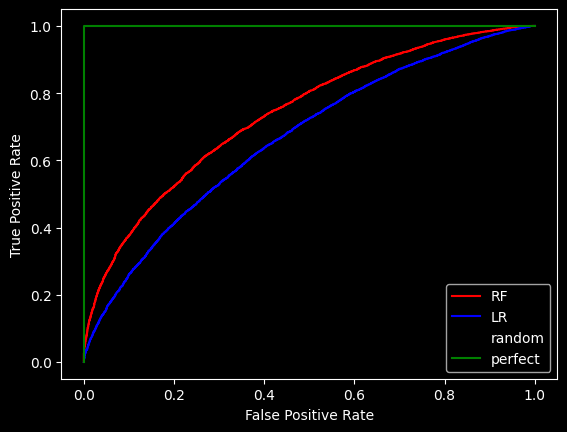

In [17]:
import matplotlib.pyplot as plt

plt.plot(fpr_RF, tpr_RF, "r-", label="RF")
plt.plot(fpr_LR, tpr_LR, "b-", label="LR")
plt.plot([0, 1], [0, 1], "k-", label="random")
plt.plot([0, 0, 1, 1], [0, 1, 1, 1], "g-", label="perfect")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score

auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)
print("AUC RF:%.3f" % auc_RF)
print("AUC LR:%.3f" % auc_LR)

AUC RF:0.738
AUC LR:0.666


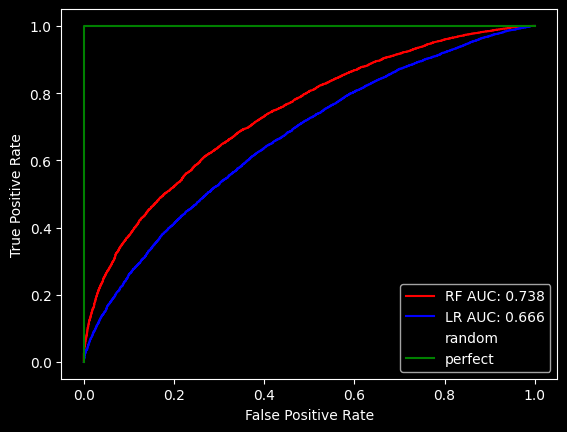

In [19]:
import matplotlib.pyplot as plt

plt.plot(fpr_RF, tpr_RF, "r-", label="RF AUC: %.3f" % auc_RF)
plt.plot(fpr_LR, tpr_LR, "b-", label="LR AUC: %.3f" % auc_LR)
plt.plot([0, 1], [0, 1], "k-", label="random")
plt.plot([0, 0, 1, 1], [0, 1, 1, 1], "g-", label="perfect")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()